In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform

In [3]:
x1 = uniform.rvs(size=500) - 0.5
x2 = uniform.rvs(size=500) - 0.5
X = np.stack((x1, x2), axis=1)
y = 1 * ((x1 ** 2 - x2 ** 2) > 0)

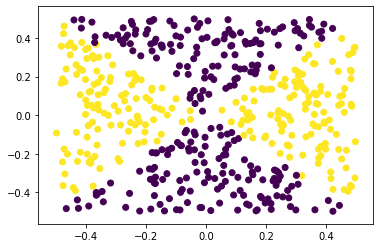

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [37]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(solver='lbfgs').fit(X, y)

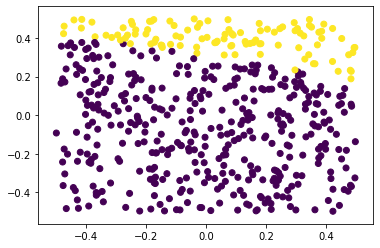

In [35]:
pred = reg.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

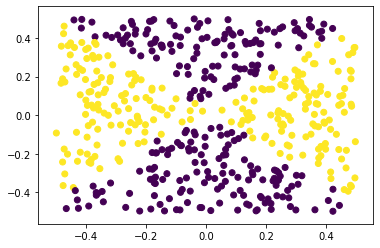

In [36]:
# a * b term is X[:, 3]
# In this case, the interaction term ab is excluded
reg = LogisticRegression(solver='lbfgs').fit(X_poly[:,[0,1,2,4]],y)
y_pred = reg.predict(X_poly[:,[0,1,2,4]])

plt.scatter(X[:,0], X[:,1], c=y_pred)

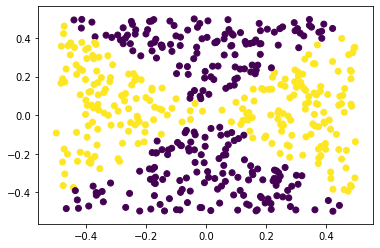

In [24]:
# The inclusion of the interaction term doesn't improve much.

reg = LogisticRegression(solver='lbfgs').fit(X_poly, y)
y_pred = reg.predict(X_poly)

plt.scatter(X[:,0], X[:,1], c=y_pred)

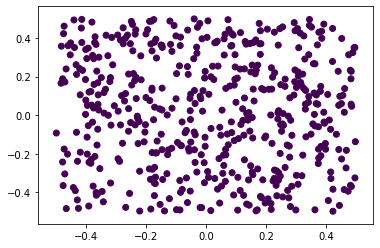

In [28]:
from sklearn.svm import SVC

# The support vector classifier is SVM with linear kernel
clf = SVC(kernel='linear').fit(X,y)
y_pred = clf.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)

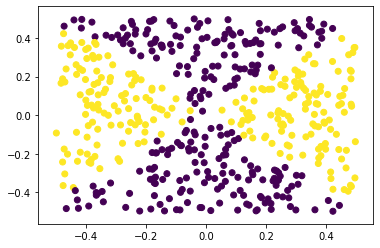

In [27]:
from sklearn.svm import SVC

# The radical kernel is chosen
clf = SVC(kernel='rbf', gamma='scale').fit(X, y)
y_pred = clf.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)